# Tennis Ace
## Machine Learning - Linear Regression Project

### Import Python Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load and investigate the data. 

<b>Identify the Data.</b>
<br>`Player`: name of the tennis player
<br>`Year`: year data was recorded


<b>Service Game Columns (Offensive)</b>
<br>`Aces`: number of serves by the player where the receiver does not touch the ball
<br>`DoubleFaults`: number of times player missed both first and second serve attempts
<br>`FirstServe`: % of first-serve attempts made
<br>`FirstServePointsWon`: % of first-serve attempt points won by the player
<br>`SecondServePointsWon`: % of second-serve attempt points won by the player
<br>`BreakPointsFaced`: number of times where the receiver could have won service game of the player
<br>`BreakPointsSaved`: % of the time the player was able to stop the receiver from winning service game when they had the chance
<br>`ServiceGamesPlayed`: total number of games where the player served
<br>`ServiceGamesWon`: total number of games where the player served and won
<br>`TotalServicePointsWon`: % of points in games where the player served that they won


<b>Return Game Columns (Defensive)</b>
<br>`FirstServeReturnPointsWon`: % of opponents first-serve points the player was able to win
<br>`SecondServeReturnPointsWon`: % of opponents second-serve points the player was able to win
<br>`BreakPointsOpportunities`: number of times where the player could have won the service game of the opponent
<br>`BreakPointsConverted`: % of the time the player was able to win their opponent’s service game when they had the chance
<br>`ReturnGamesPlayed`: total number of games where the player’s opponent served
<br>`ReturnGamesWon`: total number of games where the player’s opponent served and the player won
<br>`ReturnPointsWon`: total number of points where the player’s opponent served and the player won
<br>`TotalPointsWon`: % of points won by the player


<b>Outcomes</b>
<br>`Wins`: number of matches won in a year
<br>`Losses`: number of matches lost in a year
<br>`Winnings`: total winnings in USD($) in a year
<br>`Ranking`: ranking at the end of year

In [2]:
tennis = pd.read_csv('tennis_stats.csv')

In [3]:
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


### Exploratory Analysis
Plotting different features against different outcomes to see whether there is any relationship between the features and outcomes. It seems a positive linear relationship between `Aces` vs. `Wins` while a strong linear relationship between `BreakPointsFaced` vs. `Wins` and `BreakPointsOpportunities` vs. `Wins`.

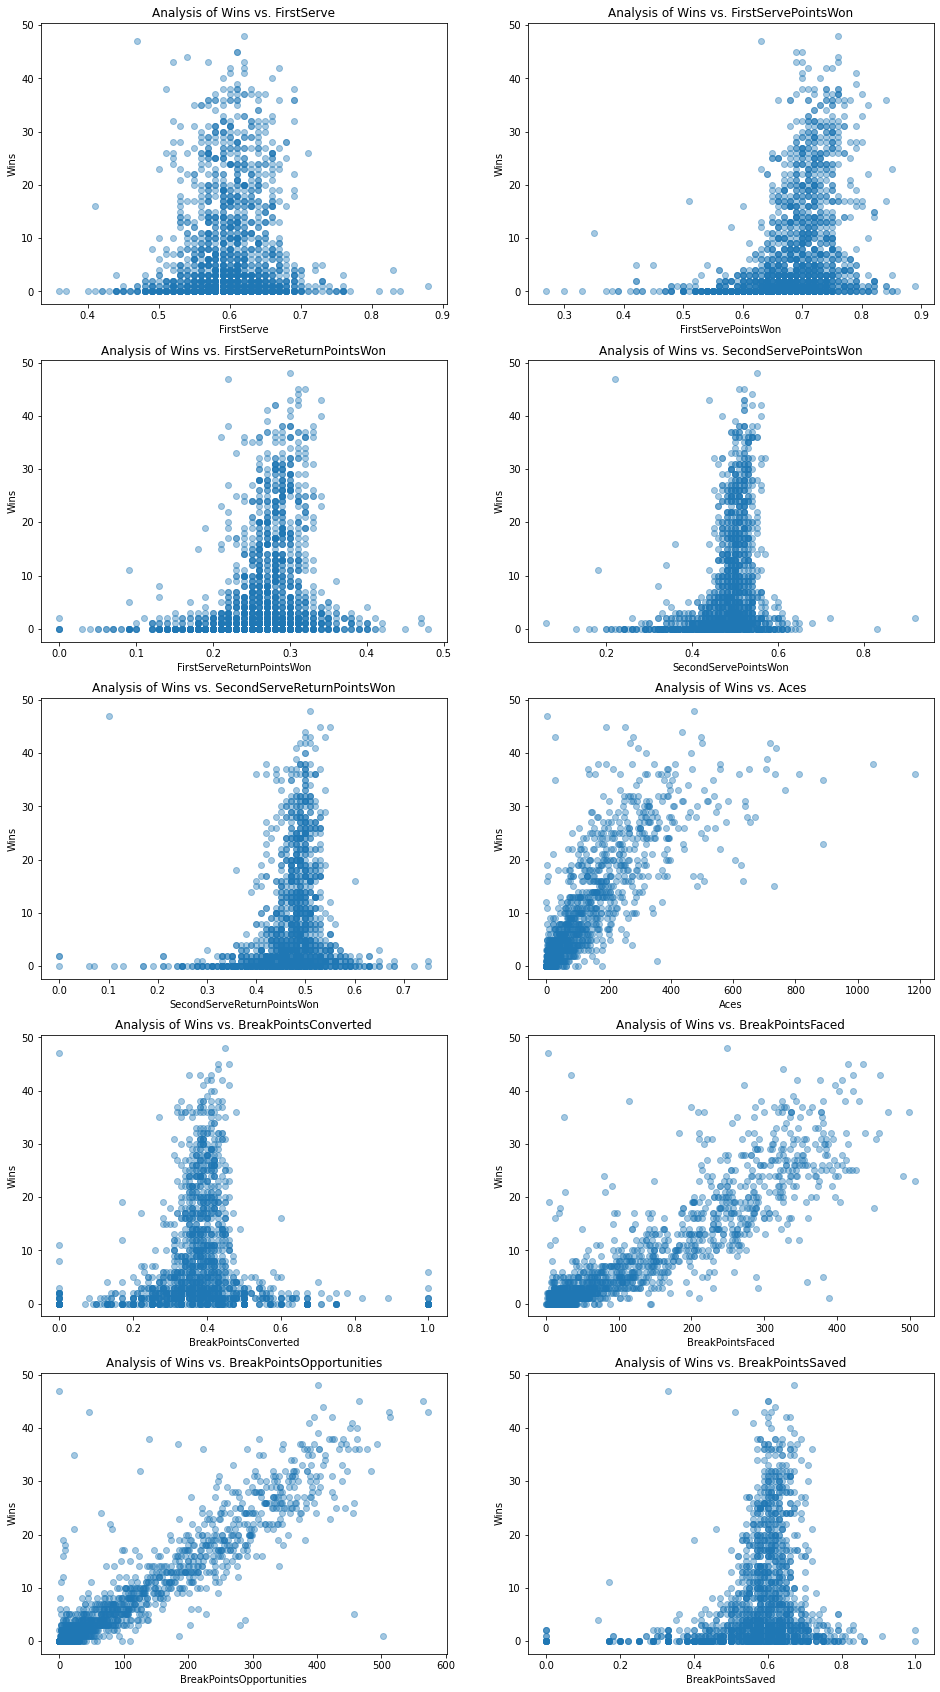

In [4]:
plt.figure(figsize=(16,30))
for i in range(1, 11):   
    plt.subplot(5,2,i)
    plt.scatter(tennis.columns[i+1], 'Wins', data=tennis, alpha=0.4)
    plt.xlabel(tennis.columns[i+1])
    plt.ylabel('Wins')
    plt.title('Analysis of Wins vs. {}'.format(tennis.columns[i+1]))
plt.show()

Investigate further using `BreakPointsOpportunities` and `Wins` to build a linear regression model and create a visualization.

In [5]:
BPO = tennis[['BreakPointsOpportunities']]
wins = tennis[['Wins']]

BPO_train, BPO_test, win_train, win_test = \
                                train_test_split(BPO, wins, train_size=0.8, test_size=0.2)

BPO_Win = LinearRegression()
BPO_Win.fit(BPO_train, win_train)

print('Predicting winnings with Break Points Opportunities test score - 1 feature:', BPO_Win.score(BPO_test, win_test))

Predicting winnings with Break Points Opportunities test score - 1 feature: 0.8879788880942765


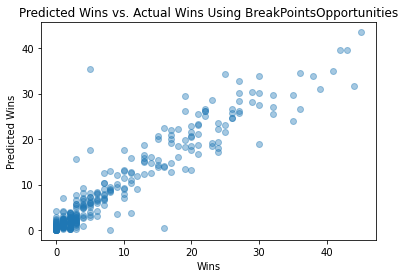

In [6]:
win_prediction = BPO_Win.predict(BPO_test)
plt.scatter(win_test, win_prediction, alpha=0.4)
plt.xlabel('Wins')
plt.ylabel('Predicted Wins')
plt.title('Predicted Wins vs. Actual Wins Using BreakPointsOpportunities')
plt.show()

Investigate the relationship between `Aces` vs. `Wins` and `BreakPointsFaced` vs. `Wins`, respectively.

In [7]:
aces = tennis[['Aces']]

aces_train, aces_test, wins_train, wins_test = \
                                train_test_split(aces, wins, train_size=0.8, test_size=0.2)

aces_wins = LinearRegression()
aces_wins.fit(aces_train, wins_train)

print('Predicting winnings with Aces test score - 1 feature:', aces_wins.score(aces, wins))

Predicting winnings with Aces test score - 1 feature: 0.6810540453420364


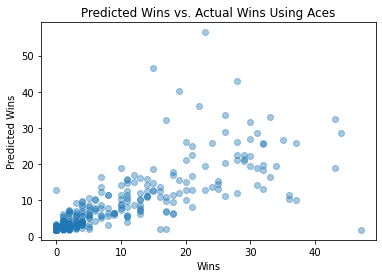

In [8]:
aces_wins_prediction = aces_wins.predict(aces_test)
plt.scatter(wins_test, aces_wins_prediction, alpha=0.4)
plt.xlabel('Wins')
plt.ylabel('Predicted Wins')
plt.title('Predicted Wins vs. Actual Wins Using Aces')
plt.show()

In [9]:
BPF = tennis[['BreakPointsFaced']]

BPF_train, BPF_test, wins_train, wins_test = \
                                train_test_split(BPF, wins, train_size=0.8, test_size=0.2)

BPF_wins = LinearRegression()
BPF_wins.fit(BPF_train, wins_train)

print('Predicting winnings with Break Points Faced test score - 1 feature:', BPF_wins.score(BPF, wins))

Predicting winnings with Break Points Faced test score - 1 feature: 0.7804712062611926


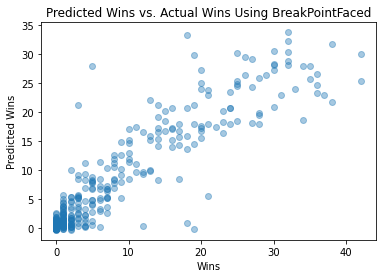

In [10]:
BPF_wins_prediction = BPF_wins.predict(BPF_test)
plt.scatter(wins_test, BPF_wins_prediction, alpha=0.4)

plt.xlabel('Wins')
plt.ylabel('Predicted Wins')
plt.title('Predicted Wins vs. Actual Wins Using BreakPointFaced')
plt.show()

<b> Multiple linear regression</b>
<br>Use two features to predict yearly earnings    

In [11]:
win_loss = tennis[['Wins', 'Losses']]
win_rank = tennis[['Wins', 'Ranking']]
earning = tennis[['Winnings']]

In [12]:
win_loss_train, win_loss_test, earn_train, earn_test = \
                                train_test_split(win_loss, earning, \
                                train_size=0.8, test_size=0.2)

wl = LinearRegression()
wl.fit(win_loss_train, earn_train)

print('Predicting winnings with Wins and Losses test score - 2 features:', wl.score(win_loss_test, earn_test))

Predicting winnings with Wins and Losses test score - 2 features: 0.8296248678724226


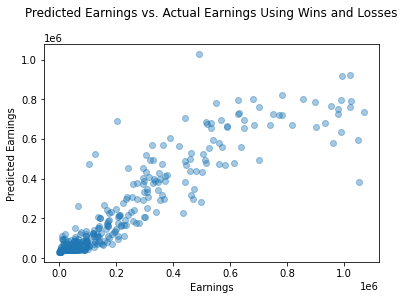

In [13]:
win_loss_prediction = wl.predict(win_loss_test)
plt.scatter(earn_test, win_loss_prediction, alpha=0.4)
plt.xlabel('Earnings')
plt.ylabel('Predicted Earnings')
plt.title('Predicted Earnings vs. Actual Earnings Using Wins and Losses', y=1.1)
plt.show()

In [14]:
win_rank_train, win_rank_test, earn_train, earn_test = \
                                        train_test_split(win_rank, earning,
                                                        train_size=0.8, test_size=0.2)
wr = LinearRegression()
wr.fit(win_rank_train, earn_train)

print('Predicting winnings with Wins and Ranking test score - 2 features:', wr.score(win_rank_test, earn_test))

Predicting winnings with Wins and Ranking test score - 2 features: 0.8461295720867537


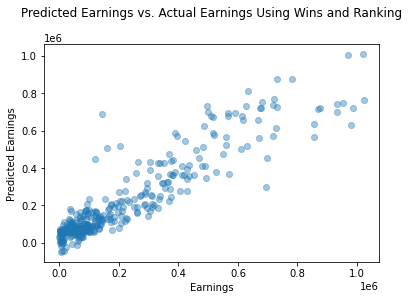

In [15]:
win_rank_prediction = wr.predict(win_rank_test)
plt.scatter(earn_test, win_rank_prediction, alpha=0.4)
plt.xlabel('Earnings')
plt.ylabel('Predicted Earnings')
plt.title('Predicted Earnings vs. Actual Earnings Using Wins and Ranking', y=1.1)
plt.show()

Use multiple features to predict yearly earnings

In [16]:
multi_tennis = tennis[['ServiceGamesPlayed', 'ServiceGamesWon', 'FirstServeReturnPointsWon',\
                 'SecondServeReturnPointsWon', 'ReturnGamesPlayed', 'ReturnGamesWon',\
                 'ReturnPointsWon', 'TotalPointsWon']]

In [17]:
multi_train, multi_test, earn_train, earn_test = \
                    train_test_split(multi_tennis, earning, train_size=0.8, test_size=0.2)

mt = LinearRegression()
mt.fit(multi_train, earn_train)

print('Predicting winnings with multiple features test score:', mt.score(multi_test, earn_test))

Predicting winnings with multiple features test score: 0.8471877727445096


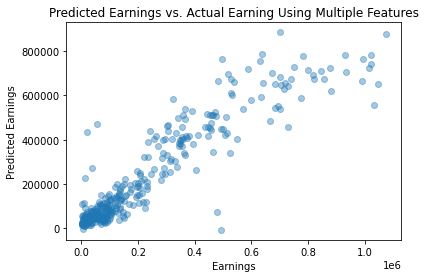

In [18]:
mt_prediction = mt.predict(multi_test)

plt.scatter(earn_test, mt_prediction, alpha=0.4)
plt.xlabel('Earnings')
plt.ylabel('Predicted Earnings')
plt.title('Predicted Earnings vs. Actual Earning Using Multiple Features')
plt.show()